In [1]:
import torch
import torch.nn as nn

# Build NN

In [2]:
MyNet = nn.Sequential(
        nn.Linear(2, 3),
        nn.Linear(3, 2),
        nn.Linear(2, 1)
)
print(MyNet)

Sequential(
  (0): Linear(in_features=2, out_features=3, bias=True)
  (1): Linear(in_features=3, out_features=2, bias=True)
  (2): Linear(in_features=2, out_features=1, bias=True)
)


In [3]:
for param in MyNet.parameters():
    if param.requires_grad:
        print(param.data)

tensor([[ 0.5298,  0.5403],
        [-0.1335,  0.0788],
        [-0.0644,  0.3744]])
tensor([-0.1011,  0.6955,  0.4993])
tensor([[-0.0378,  0.5643,  0.3768],
        [ 0.4877,  0.3100, -0.1657]])
tensor([-0.2588, -0.4216])
tensor([[-0.0536, -0.1939]])
tensor([0.5564])


# Prepare input data

In [4]:
lstX = [ [1, 2], [2, 3], [10, 5]]
tensorX = torch.FloatTensor(lstX)
print(tensorX, "\n", tensorX.shape)

tensor([[ 1.,  2.],
        [ 2.,  3.],
        [10.,  5.]]) 
 torch.Size([3, 2])


In [5]:
lstY = [[7], [12], [40]]  # y=3x1+2x2
tensorY = torch.FloatTensor(lstY)
print(tensorY, '\n', tensorY.shape)

tensor([[ 7.],
        [12.],
        [40.]]) 
 torch.Size([3, 1])


# Forward propagation 練習

In [6]:
W1 = MyNet[0].weight
b1 = MyNet[0].bias   
print(W1, W1.shape, b1)

Parameter containing:
tensor([[ 0.5298,  0.5403],
        [-0.1335,  0.0788],
        [-0.0644,  0.3744]], requires_grad=True) torch.Size([3, 2]) Parameter containing:
tensor([-0.1011,  0.6955,  0.4993], requires_grad=True)


In [7]:
#3筆 input 的 n3, n4, n5
HiddenLayer1 = MyNet[0](tensorX)  
print(HiddenLayer1)

tensor([[ 1.5093,  0.7196,  1.1837],
        [ 2.5794,  0.6649,  1.4937],
        [ 7.8983, -0.2451,  1.7276]], grad_fn=<AddmmBackward>)


In [8]:
# 自己用矩陣相乘驗證 3筆 input 的 n3, n4, n5
HiddenLayer1 = tensorX.mm(torch.transpose(W1, 1, 0)) + b1
print(HiddenLayer1)

tensor([[ 1.5093,  0.7196,  1.1837],
        [ 2.5794,  0.6649,  1.4937],
        [ 7.8983, -0.2451,  1.7276]], grad_fn=<AddBackward0>)


In [9]:
#3筆 input 的 n6, n7
HiddenLayer2 = MyNet[1](HiddenLayer1)
print(HiddenLayer2)

tensor([[ 0.5362,  0.3414],
        [ 0.5817,  0.7950],
        [-0.0451,  3.0682]], grad_fn=<AddmmBackward>)


In [10]:
# 自己用矩陣相乘驗證3筆 input 的 n6, n7
W2 = MyNet[1].weight
b2 = MyNet[1].bias  
HiddenLayer2 = HiddenLayer1.mm(torch.transpose(W2, 1, 0)) +b2
print(HiddenLayer2)

tensor([[ 0.5362,  0.3414],
        [ 0.5817,  0.7950],
        [-0.0451,  3.0682]], grad_fn=<AddBackward0>)


In [11]:
#3筆 input 的 y1
tensorY1= MyNet[2](HiddenLayer2)
print(tensorY1)

tensor([[ 0.4615],
        [ 0.3711],
        [-0.0360]], grad_fn=<AddmmBackward>)


In [12]:
# 自己用矩陣相乘驗證3筆 input 的 y1
W3 = MyNet[2].weight
b3 = MyNet[2].bias  
tensorY1 = HiddenLayer2.mm(torch.transpose(W3, 1, 0)) +b3
print(tensorY1)

tensor([[ 0.4615],
        [ 0.3711],
        [-0.0360]], grad_fn=<AddBackward0>)


In [13]:
# 一次計算3筆 input 的 y1
tensorY1= MyNet(tensorX)
print(tensorY1)

tensor([[ 0.4615],
        [ 0.3711],
        [-0.0360]], grad_fn=<AddmmBackward>)


# Backward propagation

In [14]:
import torch.optim as optim

In [15]:
loss_func = nn.MSELoss()

In [17]:
optimizer = optim.Adam(MyNet.parameters(), lr=0.05)

In [18]:
loss = loss_func(tensorY1, tensorY)
print(loss, '\n', float(loss))

tensor(593.6230, grad_fn=<MseLossBackward>) 
 593.623046875


In [19]:
optimizer.zero_grad()

In [20]:
loss.backward()

In [21]:
optimizer.step()

# Training Loop

In [22]:
lossLst = []
for epoch in range(1, 30):
    tensorY1 = MyNet(tensorX)
    loss = loss_func(tensorY1, tensorY)
    loss1 = float(loss)
    print("%.2f" % (loss1), end = ", ")
    lossLst.append(loss1)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

581.25, 572.61, 566.05, 559.63, 550.34, 535.87, 515.01, 486.72, 449.84, 403.54, 347.66, 283.04, 212.03, 139.29, 72.76, 24.61, 10.35, 39.33, 89.79, 117.69, 109.39, 79.19, 45.61, 20.98, 9.63, 9.86, 17.15, 26.79, 35.28, 

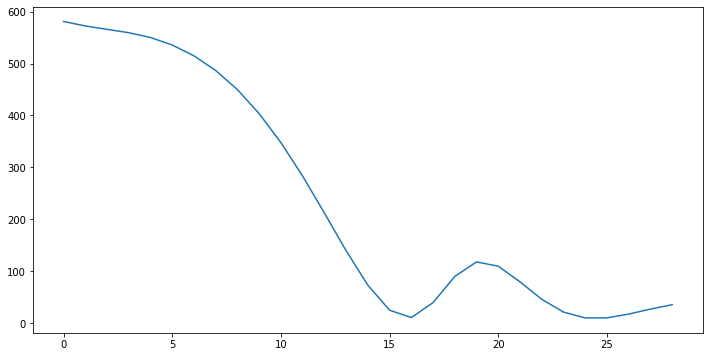

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(lossLst)
plt.show()